In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap

# from example_1 import build_tree, predict, print_tree, accuracy_metric, get_meshgrid
from problem_2 import build, predict, print_tree
from example_1 import accuracy_metric, get_meshgrid

### Set parameters

In [2]:
colors = {
    'base': ['red', 'blue'],
    'light': ['lightcoral', 'lightblue']
}

colors = {key: ListedColormap(value) for key, value in colors.items()}

### Make dataset

In [3]:
X, y = make_classification(
    n_features = 2, n_informative = 2,
    n_classes = 2, n_redundant=0, n_clusters_per_class=1,
    random_state=5
)

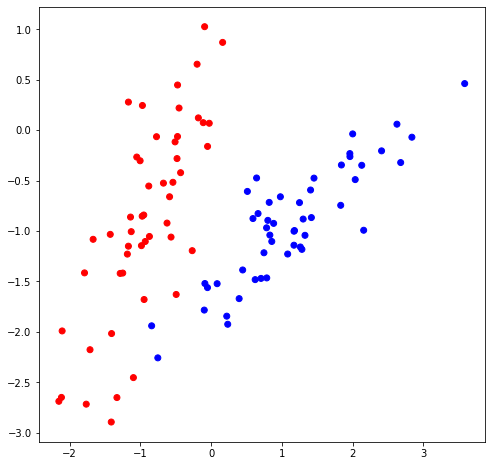

In [4]:
plt.figure(figsize=(8, 8))

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=colors['base'])

plt.show()

### Split dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3, random_state = 1
)

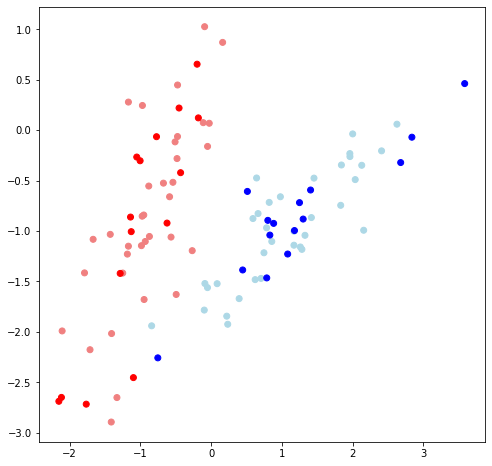

In [6]:
plt.figure(figsize=(8, 8))

plt.scatter(x=X_train[:, 0], y=X_train[:, 1],c=y_train, cmap=colors['light'])
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_test, cmap=colors['base'])   

plt.show()

### Build tree

In [7]:
# tree_train = build_tree(X_train, y_train)
tree_train = build(X_train, y_train)

In [8]:
print_tree(tree_train)

index: 0
value: 0.16261402870113306
true:
	index: 1
	value: -1.5208896621663803
	true:
		index: 0
		value: -0.9478301462477035
		true:
			prediction: 0
		false:
			prediction: 1
	false:
		prediction: 0
false:
	prediction: 1


### Make predictions

In [9]:
z_train, z_test = (predict(_, tree_train) for _ in (X_train, X_test))

In [10]:
a_train = accuracy_metric(y_train, z_train)
a_test = accuracy_metric(y_test, z_test)

print(
    f'train accuracy: {a_train:.3g}',
    f'test accuracy: {a_test:.3g}',
    sep='\n'
)    

train accuracy: 98.6
test accuracy: 100


In [11]:
xx_train, yy_train = get_meshgrid(X_train)

zz_train = np.array(
    predict(
        np.c_[xx_train.ravel(), yy_train.ravel()],
        tree_train
    )
).reshape(xx_train.shape)

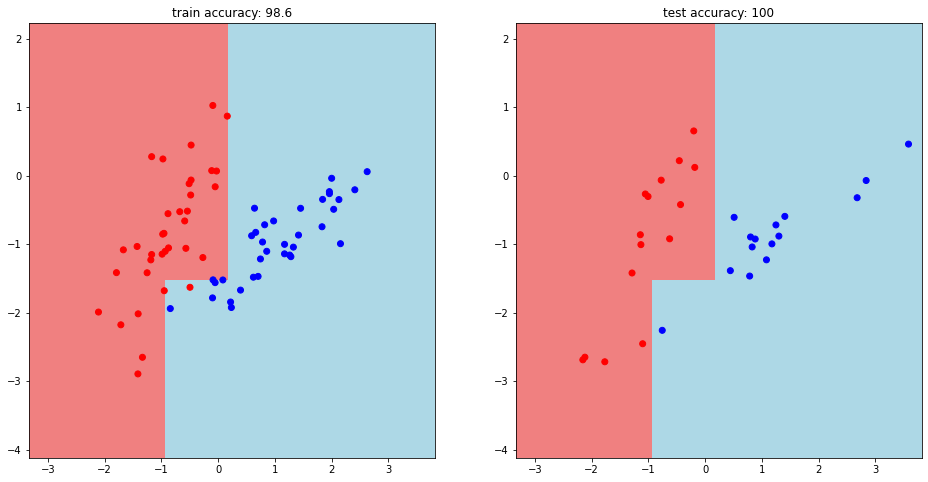

In [12]:
plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
plt.pcolormesh(xx_train, yy_train, zz_train, cmap=colors['light'], shading='auto')
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train, cmap=colors['base'])
plt.title(f'train accuracy: {a_train:.3g}')

plt.subplot(1, 2, 2)
plt.pcolormesh(xx_train, yy_train, zz_train, cmap=colors['light'], shading='auto')
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_test, cmap=colors['base'])
plt.title(f'test accuracy: {a_test:.3g}')

plt.show()